In [2]:
import requests
from bs4 import BeautifulSoup

def scrape_weather_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 気温のデータを取得
    temperature_data = []
    for row in soup.find_all('tr', class_='mtx'):
        columns = row.find_all('td')
        if len(columns) >= 3:
            date = columns[0].text.strip()
            temperature = columns[2].text.strip()
            temperature_data.append((date, temperature))

    # 降水量のデータを取得
    precipitation_data = []
    for row in soup.find_all('tr', class_='mtx'):
        columns = row.find_all('td')
        if len(columns) >= 13:
            date = columns[0].text.strip()
            precipitation = columns[12].text.strip()
            precipitation_data.append((date, precipitation))

    return temperature_data, precipitation_data

# 1つ目のURLからデータを取得
url1 = 'https://www.data.jma.go.jp/stats/etrn/view/daily_a1.php?prec_no=44&block_no=0371&year=2023&month=12&day=&view=p1'
temperature_data1, precipitation_data1 = scrape_weather_data(url1)

# 2つ目のURLからデータを取得
url2 = 'https://www.data.jma.go.jp/stats/etrn/view/daily_a1.php?prec_no=44&block_no=0371&year=2024&month=01&day=&view=p1'
temperature_data2, precipitation_data2 = scrape_weather_data(url2)

# 取得したデータを出力
print("1つ目のURLの気温データ:")
for date, temperature in temperature_data1:
    print(f"{date}: {temperature}℃")

print("\n1つ目のURLの降水量データ:")
for date, precipitation in precipitation_data1:
    print(f"{date}: {precipitation}mm")

print("\n2つ目のURLの気温データ:")
for date, temperature in temperature_data2:
    print(f"{date}: {temperature}℃")

print("\n2つ目のURLの降水量データ:")
for date, precipitation in precipitation_data2:
    print(f"{date}: {precipitation}mm")


1つ目のURLの気温データ:
1: 0.0℃
2: 0.0℃
3: 0.0℃
4: 0.0℃
5: 0.0℃
6: 0.5℃
7: 0.0℃
8: 0.0℃
9: 0.0℃
10: 0.0℃
11: 0.5℃
12: 4.5℃
13: 2.0℃
14: 0.0℃
15: 0.0℃
16: 0.0℃
17: 0.0℃
18: 0.0℃
19: 0.0℃
20: 0.0℃
21: 0.0℃
22: 0.0℃
23: 0.0℃
24: 0.0℃
25: 0.0℃
26: 0.0℃
27: 0.0℃
28: 0.0℃
29: 0.0℃
30: 0.0℃
31: 1.0℃

1つ目のURLの降水量データ:
1: 10.8mm
2: 7.2mm
3: 13.4 )mm
4: 10.8mm
5: 8.2mm
6: 9.3mm
7: 20.1mm
8: 12.3mm
9: 6.2 )mm
10: 6.7mm
11: 9.3mm
12: 10.8mm
13: 11.8mm
14: 6.7mm
15: 24.2 )mm
16: 24.2mm
17: 19.0 )mm
18: 11.8mm
19: 7.2mm
20: 7.2 )mm
21: 15.9 )mm
22: 14.4 )mm
23: 7.2mm
24: 6.2mm
25: 8.7mm
26: 11.3mm
27: 12.9mm
28: 10.8mm
29: 6.7mm
30: 7.7mm
31: 9.3mm

2つ目のURLの気温データ:
1: 0.0℃
2: 0.0℃
3: 0.0℃
4: 0.0℃
5: 0.0℃
6: 0.0℃
7: 0.0℃
8: 0.0℃
9: 0.0℃
10: ///℃
11: ///℃
12: ///℃
13: ///℃
14: ///℃
15: ///℃
16: ///℃
17: ///℃
18: ///℃
19: ///℃
20: ///℃
21: ///℃
22: ///℃
23: ///℃
24: ///℃
25: ///℃
26: ///℃
27: ///℃
28: ///℃
29: ///℃
30: ///℃
31: ///℃

2つ目のURLの降水量データ:
1: 21.1mm
2: 6.7mm
3: 4.6mm
4: 16.5mm
5: 8.7mm
6: 9.8mm
7: 15.9m

In [4]:
import sqlite3

In [5]:
def create_database():
    # SQLiteデータベースに接続
    conn = sqlite3.connect('weather_data.db')
    cursor = conn.cursor()

    # テーブルの作成（初回のみ）
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS temperature (
            date TEXT PRIMARY KEY,
            temperature TEXT
        )
    ''')

    cursor.execute('''
        CREATE TABLE IF NOT EXISTS precipitation (
            date TEXT PRIMARY KEY,
            precipitation TEXT
        )
    ''')

    # コミットしてクローズ
    conn.commit()
    conn.close()

def insert_data_into_database(data, table_name):
    # SQLiteデータベースに接続
    conn = sqlite3.connect('weather_data.db')
    cursor = conn.cursor()

    # データの挿入
    cursor.executemany(f'INSERT OR IGNORE INTO {table_name} VALUES (?, ?)', data)

    # コミットしてクローズ
    conn.commit()
    conn.close()

# データベースの作成（初回のみ）
create_database()

# 1つ目のURLからデータを取得
url1 = 'https://www.data.jma.go.jp/stats/etrn/view/daily_a1.php?prec_no=44&block_no=0371&year=2023&month=12&day=&view=p1'
temperature_data1, precipitation_data1 = scrape_weather_data(url1)

# 2つ目のURLからデータを取得
url2 = 'https://www.data.jma.go.jp/stats/etrn/view/daily_a1.php?prec_no=44&block_no=0371&year=2024&month=01&day=&view=p1'
temperature_data2, precipitation_data2 = scrape_weather_data(url2)

# データベースにデータを挿入
insert_data_into_database(temperature_data1, 'temperature')
insert_data_into_database(precipitation_data1, 'precipitation')
insert_data_into_database(temperature_data2, 'temperature')
insert_data_into_database(precipitation_data2, 'precipitation')

In [6]:
import sqlite3

def read_data_from_database(table_name):
    # SQLiteデータベースに接続
    conn = sqlite3.connect('weather_data.db')
    cursor = conn.cursor()

    # データの取得
    cursor.execute(f'SELECT * FROM {table_name}')
    data = cursor.fetchall()

    # コミットしてクローズ
    conn.commit()
    conn.close()

    return data

# データベースから気温データを取得して表示
temperature_data = read_data_from_database('temperature')
print("気温データ:")
for row in temperature_data:
    print(row)

# データベースから降水量データを取得して表示
precipitation_data = read_data_from_database('precipitation')
print("\n降水量データ:")
for row in precipitation_data:
    print(row)


気温データ:
('1', '0.0')
('2', '0.0')
('3', '0.0')
('4', '0.0')
('5', '0.0')
('6', '0.5')
('7', '0.0')
('8', '0.0')
('9', '0.0')
('10', '0.0')
('11', '0.5')
('12', '4.5')
('13', '2.0')
('14', '0.0')
('15', '0.0')
('16', '0.0')
('17', '0.0')
('18', '0.0')
('19', '0.0')
('20', '0.0')
('21', '0.0')
('22', '0.0')
('23', '0.0')
('24', '0.0')
('25', '0.0')
('26', '0.0')
('27', '0.0')
('28', '0.0')
('29', '0.0')
('30', '0.0')
('31', '1.0')

降水量データ:
('1', '10.8')
('2', '7.2')
('3', '13.4 )')
('4', '10.8')
('5', '8.2')
('6', '9.3')
('7', '20.1')
('8', '12.3')
('9', '6.2 )')
('10', '6.7')
('11', '9.3')
('12', '10.8')
('13', '11.8')
('14', '6.7')
('15', '24.2 )')
('16', '24.2')
('17', '19.0 )')
('18', '11.8')
('19', '7.2')
('20', '7.2 )')
('21', '15.9 )')
('22', '14.4 )')
('23', '7.2')
('24', '6.2')
('25', '8.7')
('26', '11.3')
('27', '12.9')
('28', '10.8')
('29', '6.7')
('30', '7.7')
('31', '9.3')


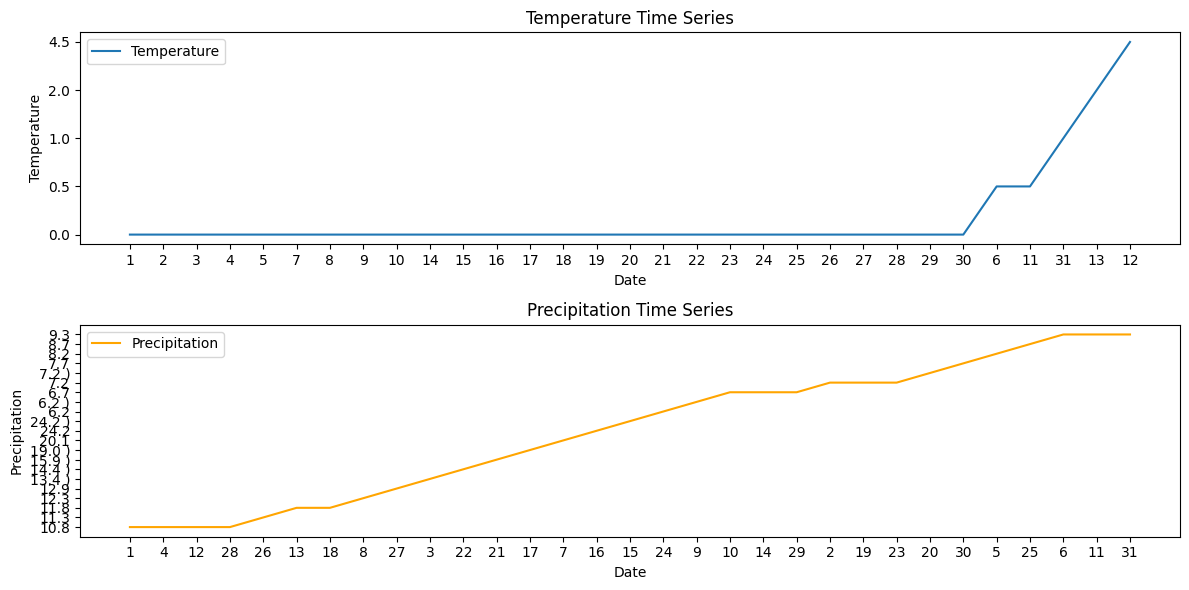

In [7]:
import matplotlib.pyplot as plt

# データをソート
sorted_temperature_data = sorted(temperature_data, key=lambda x: x[1])
sorted_precipitation_data = sorted(precipitation_data, key=lambda x: x[1])

# ソートされたデータから日付と値を取得
dates_temp, temperatures = zip(*sorted_temperature_data)
dates_precip, precipitations = zip(*sorted_precipitation_data)

# 時系列グラフの描画
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(dates_temp, temperatures, label='Temperature')
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(dates_precip, precipitations, label='Precipitation', color='orange')
plt.title('Precipitation Time Series')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()

plt.tight_layout()
plt.show()



In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("/Users/yanoyuutarou/ds-pro/sleeptime.csv")

/Users/yanoyuutarou/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yanoyuutarou/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


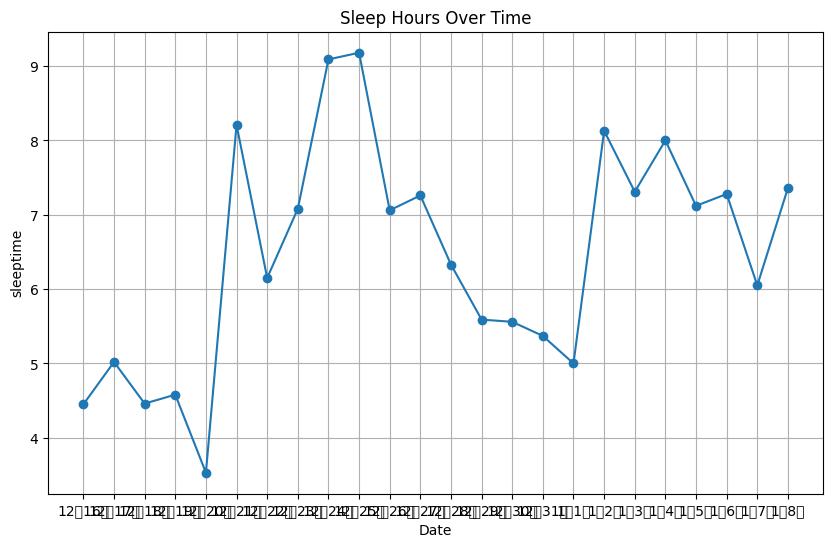

In [10]:
import matplotlib.pyplot as plt

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['sleeptime'], marker='o', linestyle='-')
plt.title('Sleep Hours Over Time')
plt.xlabel('Date')
plt.ylabel('sleeptime')
plt.grid(True)
plt.show()
